In [1]:

# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Charger et inspecter le jeu de données
data = pd.read_csv('/content/balanced_clean_data.csv')

# Diviser les données en caractéristiques (X) et cible (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fonction d'optimisation et d'évaluation des modèles
def evaluate_model(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    return best_model, best_score

In [2]:
# Logistic Regression
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga']
}

best_lr, best_lr_score = evaluate_model(LogisticRegression(max_iter=1000), lr_params)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

In [6]:
best_lr_score

0.7332356049500562

In [3]:
# Decision Tree Classifier
dt_params = {
    'max_depth': [3, 5, 10, 15, None],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}
best_dt, best_dt_score = evaluate_model(DecisionTreeClassifier(), dt_params)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


In [7]:
best_dt_score

0.802413663791634

In [ ]:
# Random Forest Classifier
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
best_rf, best_rf_score = evaluate_model(RandomForestClassifier(), rf_params)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [4]:
# XGBoost Classifier
xgb_params = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10, 15],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.5, 1],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 10, 100]
}
best_xgb, best_xgb_score = evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_params)

Fitting 5 folds for each of 62208 candidates, totalling 311040 fits


KeyboardInterrupt: 

In [ ]:
# Évaluation des modèles avec Cross Validation
models = {
    "Logistic Regression": best_lr,
    "Decision Tree": best_dt,
    "Random Forest": best_rf,
    "XGBoost": best_xgb
}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} - Cross Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

Logistic Regression - Cross Validation Accuracy: 0.7333 ± 0.0029
Decision Tree - Cross Validation Accuracy: 0.7988 ± 0.0013
Random Forest - Cross Validation Accuracy: 0.8447 ± 0.0014


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:05:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:05:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:05:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:05:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:05:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Cross Validation Accuracy: 0.8149 ± 0.0016


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report
import numpy as np
from sklearn.preprocessing import label_binarize

def print_metrics(model, X_test, y_test, model_name):
    # Vérification et conversion de y_test
    if len(y_test.shape) > 1 and y_test.shape[1] > 1:
        y_test_onehot = y_test
        y_test = np.argmax(y_test, axis=1)  # Convertir en étiquettes simples
    else:
        y_test_onehot = label_binarize(y_test, classes=np.unique(y_test))  # Encodage one-hot pour AUC si nécessaire

    # Prédictions
    y_pred = model.predict(X_test)

    # Calcul des métriques
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')

    # Gestion de roc_auc_score (uniquement si le modèle a predict_proba)
    auc = None
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        try:
            auc = roc_auc_score(y_test_onehot, y_proba, multi_class='ovr')
        except ValueError as e:
            print(f"Warning: Unable to compute AUC for {model_name}. Reason: {e}")

    # Affichage des résultats
    print(f"{model_name} Test Accuracy: {acc:.4f}")
    print(f"{model_name} Precision: {prec:.4f}")
    print(f"{model_name} Recall: {rec:.4f}")
    if auc is not None:
        print(f"{model_name} AUC: {auc:.4f}")
    print(classification_report(y_test, y_pred))

# Appeler la fonction pour chaque modèle
for model_name, model in models.items():
    print_metrics(model, X_test, y_test, model_name)


Logistic Regression Test Accuracy: 0.7329
Logistic Regression Precision: 0.7329
Logistic Regression Recall: 0.7329
              precision    recall  f1-score   support

           0       0.73      0.73      0.73     18242
           1       0.73      0.74      0.74     18425

    accuracy                           0.73     36667
   macro avg       0.73      0.73      0.73     36667
weighted avg       0.73      0.73      0.73     36667

Decision Tree Test Accuracy: 0.8089
Decision Tree Precision: 0.8099
Decision Tree Recall: 0.8089
              precision    recall  f1-score   support

           0       0.83      0.78      0.80     18242
           1       0.79      0.84      0.82     18425

    accuracy                           0.81     36667
   macro avg       0.81      0.81      0.81     36667
weighted avg       0.81      0.81      0.81     36667

Random Forest Test Accuracy: 0.8541
Random Forest Precision: 0.8553
Random Forest Recall: 0.8541
              precision    recall  f1

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:17:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:17:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:17:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:17:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:17:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

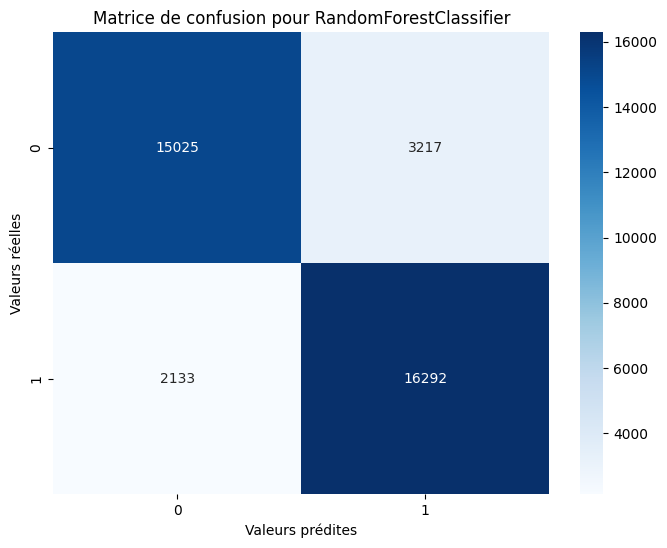

In [ ]:
# Visualisation de la matrice de confusion pour le meilleur modèle
best_model = max(models.items(), key=lambda item: cross_val_score(item[1], X_train, y_train, cv=5).mean())[1]
y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title(f"Matrice de confusion pour {type(best_model).__name__}")
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.show()

In [ ]:
# Sauvegarder le meilleur modèle
best_model_path = '/content/best_model.pkl'
joblib.dump(best_model, best_model_path)

['/content/best_model.pkl']

tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Define a simple deep learning model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
1834/1834 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.6222 - loss: 0.7122 - val_accuracy: 0.7321 - val_loss: 0.5916
Epoch 2/50
1834/1834 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7147 - loss: 0.6141 - val_accuracy: 0.7382 - val_loss: 0.5721
Epoch 3/50
1834/1834 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7280 - loss: 0.5896 - val_accuracy: 0.7414 - val_loss: 0.5613
Epoch 4/50
1834/1834 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7285 - loss: 0.5782 - val_accuracy: 0.7432 - val_loss: 0.5519
Epoch 5/50
1834/1834 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7328 - loss: 0.5647 - val_accuracy: 0.7439 - val_loss: 0.5448
Epoch 6/50
1834/1834 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7373 - loss: 0.5571 - val_accuracy: 0.7438 - val_loss: 0.5395
Epoch 7/50
1834/1834 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7367 - loss: 0.5529 - val_accuracy: 0.7449 - val_loss: 0.5339
Epoch 8/50
1834/1834 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7365 - loss: 0.5462 

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7488 - loss: 0.5074
Test Loss: 0.5075079202651978, Test Accuracy: 0.7485477328300476


In [ ]:
# Save the entire model
model.save('/content/tfmodel.keras')